In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical
import tensorflow.keras.datasets as datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Reshape, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
MAX_WORDS = 10000

In [3]:
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_words, train_labels), (test_words, test_labels) = datasets.reuters.load_data(num_words=MAX_WORDS)
print(type(train_words), train_words.shape)
print(type(train_labels), train_labels.shape)

# restore np.load for future normal usage
np.load = np_load_old

max_val = 0
for i in range(len(train_words)):
    if max_val < max(train_words[i]):
        max_val = max(train_words[i])
print('Maximum word value: ', max_val)

<class 'numpy.ndarray'> (8982,)
<class 'numpy.ndarray'> (8982,)
Maximum word value:  9999


In [4]:
word_index =  datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_words[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [5]:
def vectorize_sequences(sequences, dimensions=MAX_WORDS):
    output = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        output[i, sequence] = 1
    return output

In [6]:
x_train = vectorize_sequences(train_words)
x_test = vectorize_sequences(test_words)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8982, 10000) (2246, 10000)
(8982, 46) (2246, 46)


In [7]:
print(x_train[0], sum(x_train[0]))

[0. 1. 1. ... 0. 0. 0.] 57.0


In [8]:
model = Sequential([Dense(64, activation='relu', input_shape=(MAX_WORDS,)),
                    Dropout(0.5),
                    Dense(64, activation='relu'),
#                     Dense(128, activation='relu'),
#                     Dropout(0.5),
#                     Dense(128, activation='relu'),
                    Dense(46, activation='softmax')])
model.summary()

W0817 23:17:19.925770 140267178510144 deprecation.py:506] From /home/anant/anaconda3/envs/TF/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/40
8982/8982 [==============================] - 1s 67us/sample - loss: 2.6742 - acc: 0.4525 - val_loss: 1.8173 - val_acc: 0.6015
Epoch 2/40
8982/8982 [==============================] - 0s 53us/sample - loss: 1.6425 - acc: 0.6254 - val_loss: 1.4316 - val_acc: 0.6825
Epoch 3/40
8982/8982 [==============================] - 0s 52us/sample - loss: 1.3386 - acc: 0.6956 - val_loss: 1.2718 - val_acc: 0.7142
Epoch 4/40
8982/8982 [==============================] - 0s 50us/sample - loss: 1.1700 - acc: 0.7315 - val_loss: 1.1882 - val_acc: 0.7315
Epoch 5/40
8982/8982 [==============================] - 0s 52us/sample - loss: 1.0261 - acc: 0.7609 - val_loss: 1.1092 - val_acc: 0.7551
Epoch 6/40
8982/8982 [==============================] - 0s 52us/sample - loss: 0.9124 - acc: 0.7885 - val_loss: 1.0539 - val_acc: 0.7667
Epoch 7/40
8982/8982 [==============================] - 0s 52us/sample - loss: 0.8188 - acc: 0.8084 - val_loss: 1.0247 - val_acc: 

In [28]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['acc']
test_acc = history.history['val_acc']

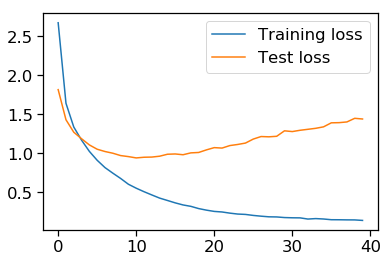

In [29]:
plt.plot(list(range(len(train_loss))), train_loss, label='Training loss')
plt.plot(list(range(len(test_loss))), test_loss, label='Test loss')
plt.legend()

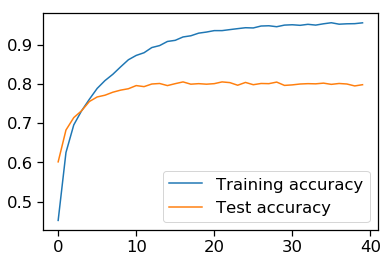

In [30]:
plt.plot(list(range(len(train_loss))), train_acc, label='Training accuracy')
plt.plot(list(range(len(test_loss))), test_acc, label='Test accuracy')
plt.legend()